#### Import Required packages:

In [1]:
import numpy as np
import cv2
import time
import os
import matplotlib.pyplot as plt

#### Labels path:

In [2]:
labels=os.path.join('C:\\Users\\nallagoni.omkar\\Desktop\\mask-rcnn\\mask-rcnn\\mask-rcnn-coco','object_detection_classes_coco.txt')

In [3]:
LABELS=open(labels).read().split('\n')

In [4]:
LABELS

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'street sign',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'hat',
 'backpack',
 'umbrella',
 'shoe',
 'eye glasses',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'plate',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'mirror',
 'dining table',
 'window',
 'desk',
 'toilet',
 'door',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'blender',
 'book',
 'clock',
 'vase',
 'scis

In [5]:
len(LABELS)

91

##### It has total 91 labels

#### Weight and configuration path:

In [6]:
weight=os.path.join('C:\\Users\\nallagoni.omkar\\Desktop\\mask-rcnn\\mask-rcnn\\mask-rcnn-coco','frozen_inference_graph.pb')

In [7]:
conf=os.path.join('C:\\Users\\nallagoni.omkar\\Desktop\\mask-rcnn\\mask-rcnn\\mask-rcnn-coco','mask_rcnn_inception_v2_coco_2018_01_28.pbtxt')

##### Laod the colors that are used while segmenting the instances:

In [8]:
colors=os.path.join('C:\\Users\\nallagoni.omkar\\Desktop\\mask-rcnn\\mask-rcnn\\mask-rcnn-coco','colors.txt')

In [9]:
COLORS=open(colors).read().split('\n')

In [10]:
COLORS

['0,255,0', '0,0,255', '255,0,0', '0,255,255', '255,255,0', '255,0,255']

In [11]:
type(COLORS[1])

str

##### Total 6 types of colors are there

###### Convert into int type:

In [12]:
np.array(COLORS[1].split(','))

array(['0', '0', '255'], dtype='<U3')

In [13]:
np.array(COLORS[1].split(',')).astype("int")

array([  0,   0, 255])

In [14]:
COLORS=[np.array(c.split(',')).astype("int") for c in COLORS]

In [15]:
COLORS=np.array(COLORS,dtype='uint8')

In [16]:
COLORS

array([[  0, 255,   0],
       [  0,   0, 255],
       [255,   0,   0],
       [  0, 255, 255],
       [255, 255,   0],
       [255,   0, 255]], dtype=uint8)

In [17]:
COLORS.dtype

dtype('uint8')

#### Loading Mask-RCNN  trained on coco data set:

In [18]:
net=cv2.dnn.readNetFromTensorflow(weight,conf)

In [19]:
type(net)

cv2.dnn_Net

In [20]:
net.getLayerId('Conv2d')

-1

In [21]:
type(net.getLayerNames)

builtin_function_or_method

In [22]:
len(net.getLayerNames())

332

In [23]:
net.getLayerTypes()

['BatchNorm',
 'Concat',
 'Convolution',
 'CropAndResize',
 'DetectionOutput',
 'Flatten',
 'Identity',
 'InnerProduct',
 'Permute',
 'Pooling',
 'Power',
 'PriorBox',
 'ReLU',
 'ReLU6',
 'Reshape',
 'Resize',
 'Scale',
 'Sigmoid',
 'Slice',
 'Softmax',
 '__NetInputLayer__']

In [24]:
net.getLayersCount('Convolution')

94

#### Load Image:

In [25]:
image=cv2.imread('C:\\Users\\nallagoni.omkar\\Desktop\\mask-rcnn\\mask-rcnn\\images\\example_01.jpg')
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

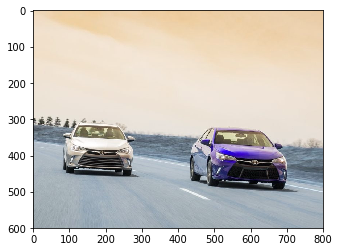

In [26]:
# Using matplotlib
plt.imshow(image)
plt.show()

#### Constructing a blob:

In [27]:
blob=cv2.dnn.blobFromImage(image,swapRB=True,crop=False)
net.setInput(blob)
start=time.time()
boxes,masks=net.forward(['detection_out_final','detection_masks'])
end=time.time()

In [28]:
print("[INFO] Mask R-CNN took {:.6f} seconds".format(end - start))
print("[INFO] boxes shape: {}".format(boxes.shape))
print("[INFO] masks shape: {}".format(masks.shape))

[INFO] Mask R-CNN took 9.315145 seconds
[INFO] boxes shape: (1, 1, 3, 7)
[INFO] masks shape: (100, 90, 15, 15)


In [29]:
boxes

array([[[[0.        , 2.        , 0.9951493 , 0.54619914, 0.53229094,
          0.8792991 , 0.83180976],
         [0.        , 2.        , 0.9937775 , 0.10509249, 0.50623065,
          0.35494593, 0.7584228 ],
         [0.        , 2.        , 0.4011244 , 0.3139527 , 0.5814059 ,
          0.3459607 , 0.6135204 ]]]], dtype=float32)

In [30]:
masks.shape

(100, 90, 15, 15)

In [31]:
H,W=image.shape[:2]

In [32]:
# loop over the number of detected objects
for i in range(0, boxes.shape[2]):
	# extract the class ID of the detection along with the confidence
	# (i.e., probability) associated with the prediction
	classID = int(boxes[0, 0, i, 1])
	confidence = boxes[0, 0, i, 2]
 
	# filter out weak predictions by ensuring the detected probability
	# is greater than the minimum probability
	if confidence >0.5:
		# clone our original image so we can draw on it
		clone = image.copy()
 
		# scale the bounding box coordinates back relative to the
		# size of the image and then compute the width and the height
		# of the bounding box
		box = boxes[0, 0, i, 3:7] * np.array([W, H, W, H])
		(startX, startY, endX, endY) = box.astype("int")
		boxW = endX - startX
		boxH = endY - startY

In [33]:
mask = masks[i, classID]
mask = cv2.resize(mask, (boxW, boxH),
interpolation=cv2.INTER_NEAREST)
mask = (mask > 0.3)
 
# extract the ROI of the image
roi = clone[startY:endY, startX:endX]

In [34]:
if visualize==0:
    # convert the mask from a boolean to an integer mask with
    # to values: 0 or 255, then apply the mask
    visMask = (mask * 255).astype("uint8")
    instance = cv2.bitwise_and(roi, roi, mask=visMask)
 
    # show the extracted ROI, the mask, along with the
    # segmented instance
#cv2.imshow("ROI", roi)
#cv2.imshow("Mask", visMask)
#cv2.imshow("Segmented", instance)

NameError: name 'visualize' is not defined

In [ ]:
import random

roi = roi[mask]
 
# randomly select a color that will be used to visualize this
# particular instance segmentation then create a transparent
# overlay by blending the randomly selected color with the ROI
color = random.choice(COLORS)
blended = ((0.4 * color) + (0.6 * roi)).astype("uint8")
 
# store the blended ROI in the original image
clone[startY:endY, startX:endX][mask] = blended

In [ ]:
# draw the bounding box of the instance on the image
color = [int(c) for c in color]
cv2.rectangle(clone, (startX, startY), (endX, endY), color, 2)
 
# draw the predicted label and associated probability of the
# instance segmentation on the image
text = "{}: {:.4f}".format(LABELS[classID], confidence)
cv2.putText(clone, text, (startX, startY - 5),
cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
 
# show the output image
cv2.imshow("Output", clone)
cv2.waitKey(0)